In [ ]:
# -*- coding: utf-8 -*-
"""Untitled3.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12lPUJqUeuPbbZFWsWLhc3FzVrogf9efm
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#visualize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
hira=pd.read_csv('/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv')
hira.head(6)


,index,Provider_Number,Hospital_Name,Address,City,State,ZIP_Code,County_Name,IMM-2 Performance Rate,IMM-2 Achievement Points,IMM-2 Improvement Points,IMM-2 Measure Score,Preventive Condition/Procedure Score
0,0,60119,MEDICAL CENTER OF THE ROCKIES,2500 ROCKY MOUNTAIN AVENUE,Loveland,CO,80538,LARIMER,0.91538,2 out of 10,7 out of 9,7 out of 10,7
1,1,330332,ST JOSEPH HOSPITAL,4295 HEMPSTEAD TURNPIKE,Bethpage,NY,11714,NASSAU,0.89249,0 out of 10,0 out of 9,0 out of 10,0
2,2,100230,MEMORIAL HOSPITAL PEMBROKE,7800 SHERIDAN ST,Pembroke Pines,FL,33024,BROWARD,1.00000,10 out of 10,9 out of 9,10 out of 10,10
3,3,330304,WHITE PLAINS HOSPITAL CENTER,41 EAST POST R0AD,White Plains,NY,10601,WESTCHESTER,1.00000,10 out of 10,9 out of 9,10 out of 10,10
4,4,330279,MERCY HOSPITAL OF BUFFALO,565 ABBOTT ROAD,Buffalo,NY,14220,ERIE,0.94667,5 out of 10,3 out of 9,5 out of 10,5
5,5,520078,WHEATON FRANCISCAN HEALTHCARE ST FRANCIS,3237 S 16TH ST,Milwaukee,WI,53215,MILWAUKEE,0.95725,6 out of 10,6 out of 9,6 out of 10,6


In [ ]:
# Step 1: Load and explore the dataset
df = pd.read_csv("/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv")

In [ ]:
# Step 2: Data Cleaning and Preprocessing
# Handle missing data
hira.dropna(axis=0,inplace=True)
hira.isnull().sum()

index                                   0
Provider_Number                         0
Hospital_Name                           0
Address                                 0
City                                    0
State                                   0
ZIP_Code                                0
County_Name                             0
IMM-2 Performance Rate                  0
IMM-2 Achievement Points                0
IMM-2 Improvement Points                0
IMM-2 Measure Score                     0
Preventive Condition/Procedure Score    0
dtype: int64

In [ ]:
# Encode categorical variables if needed
# df = pd.get_dummies(df, columns=["categorical_column"])

# Step 3: Data Analysis and Visualization
# Explore the dataset, create visualizations, and answer your questions

# Question 1: Correlation between preventive care scores and healthcare quality
correlation = df["Preventive Condition/Procedure Score"].corr(df["IMM-2 Performance Rate"])
print(f"Correlation between Preventive Care Score and Healthcare Quality Score: {correlation}")

Correlation between Preventive Care Score and Healthcare Quality Score: 0.7097332588547958


In [ ]:
# Visualizations, e.g., scatter plots, histograms, etc.
hira['Provider_Number'].value_counts()

60119     1
140164    1
390178    1
390326    1
330078    1
         ..
100224    1
100322    1
320038    1
450754    1
360161    1
Name: Provider_Number, Length: 3028, dtype: int64

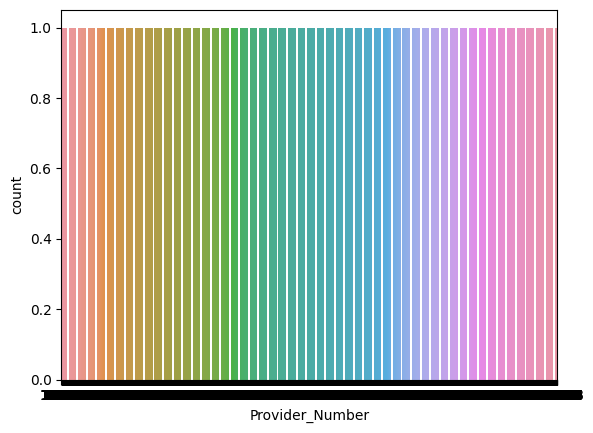

In [ ]:
sb.countplot(data=hira,x='Provider_Number');

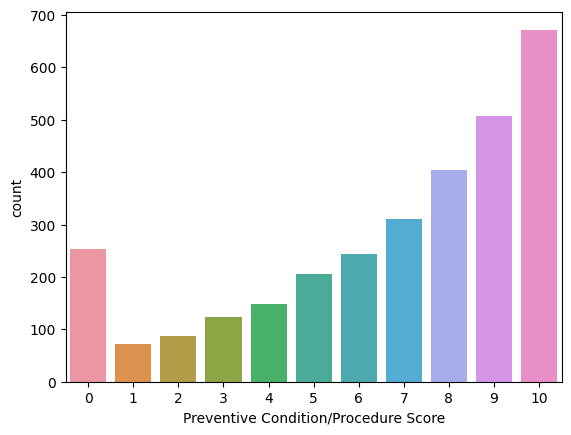

In [ ]:
sb.countplot(data=hira,x='Preventive Condition/Procedure Score');

In [ ]:
base_color=sb.color_palette()[-1]

In [ ]:
gen_order=hira['Preventive Condition/Procedure Score'].value_counts().index

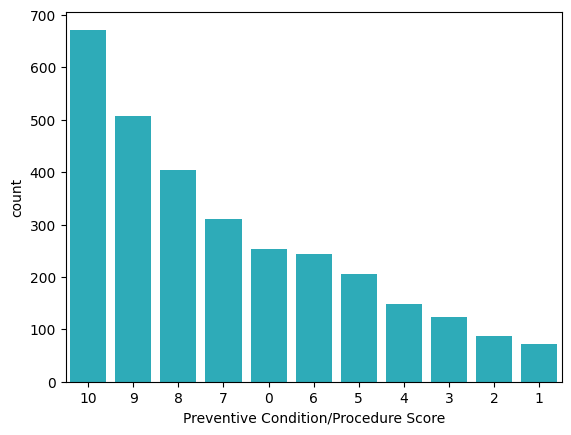

In [ ]:
sb.countplot(data=hira,x='Preventive Condition/Procedure Score',color=base_color,order=gen_order);

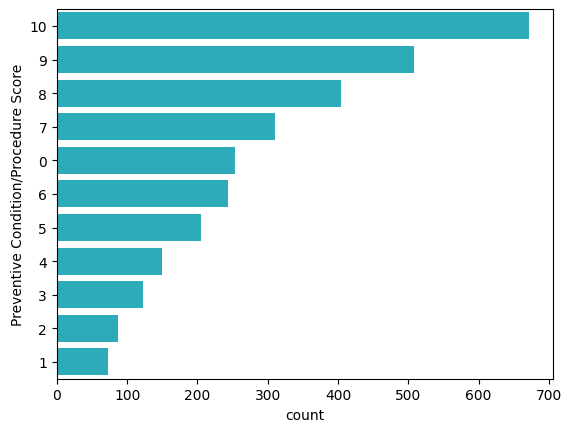

In [ ]:
sb.countplot(data=hira,y='Preventive Condition/Procedure Score',color=base_color,order=gen_order);

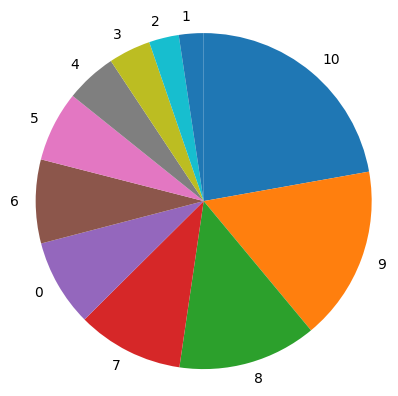

In [ ]:
sorted_counts = hira['Preventive Condition/Procedure Score'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90,counterclock=False);
plt.axis('square');

(array([ 254.,   72.,   87.,  123.,  149.,  205.,  244.,  310.,  404.,
        1180.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

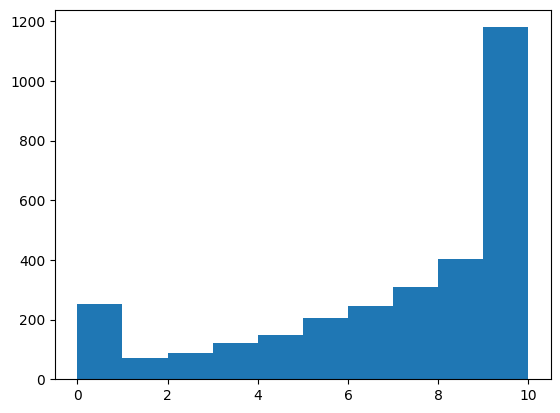

In [ ]:
plt.hist(data=hira,x='Preventive Condition/Procedure Score')

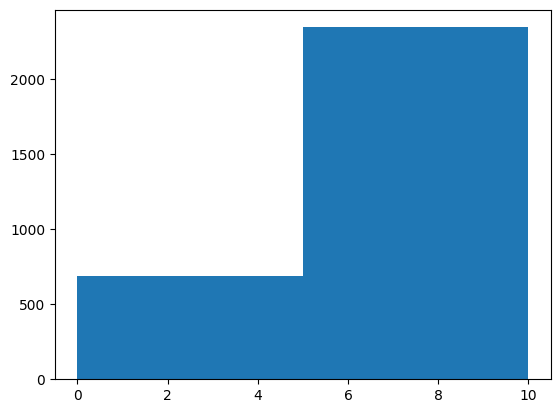

In [ ]:
bins=np.arange(0,hira['Preventive Condition/Procedure Score'].max()+5 , 5)
plt.hist(data=hira,x='Preventive Condition/Procedure Score', bins=bins);

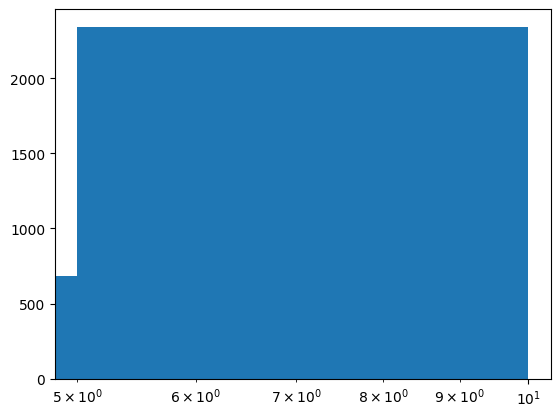

In [ ]:
bins=np.arange(0,hira['Preventive Condition/Procedure Score'].max()+5 , 5)
plt.hist(data=hira,x='Preventive Condition/Procedure Score', bins=bins);
plt.xscale('log');

Text(0, 0.5, 'Combined daimond Efficiency')

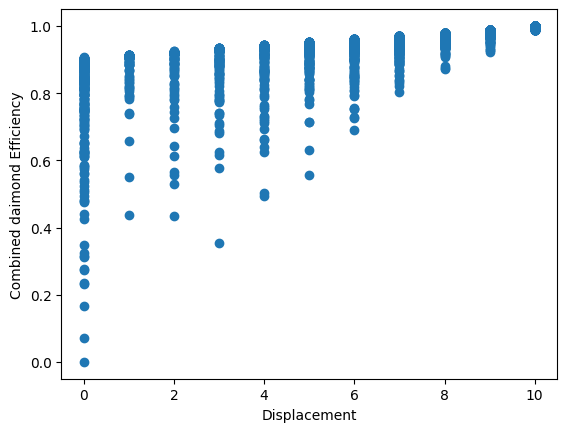

In [ ]:
plt.scatter(data=hira, x='Preventive Condition/Procedure Score',y='IMM-2 Performance Rate')
plt.xlabel('Displacement')
plt.ylabel('Combined daimond Efficiency')

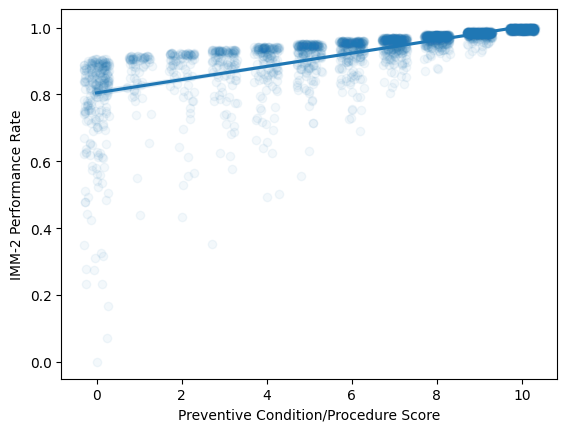

In [ ]:
sns.regplot(data=hira, x='Preventive Condition/Procedure Score',y='IMM-2 Performance Rate',x_jitter=0.3,
            scatter_kws={'alpha': 1/20});

Text(0, 0.5, 'Combined daimond Efficiency')

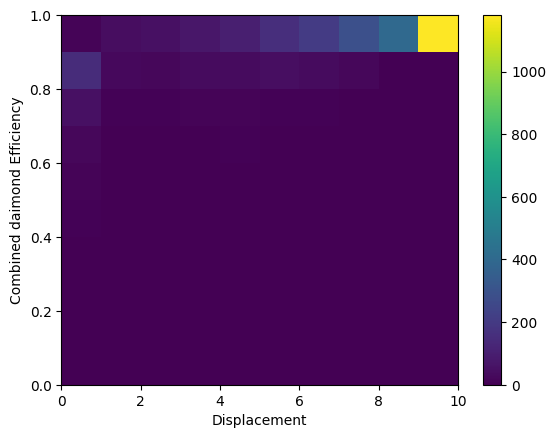

In [ ]:
plt.hist2d(data=hira, x='Preventive Condition/Procedure Score',y='IMM-2 Performance Rate')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined daimond Efficiency')

Text(0, 0.5, 'Combined daimond Efficiency')

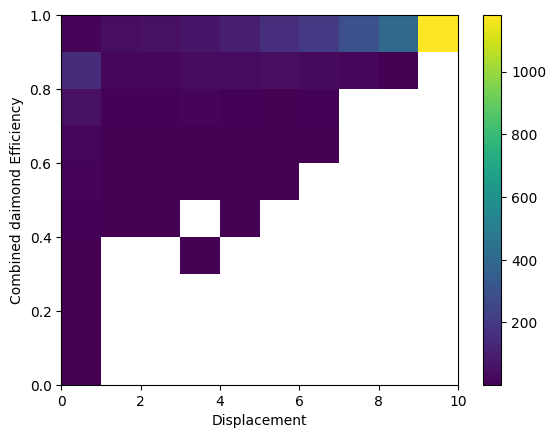

In [ ]:
plt.hist2d(data=hira, x='Preventive Condition/Procedure Score',y='IMM-2 Performance Rate',cmin=0.5)
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined daimond Efficiency')

Text(0, 0.5, 'Combined daimond Efficiency')

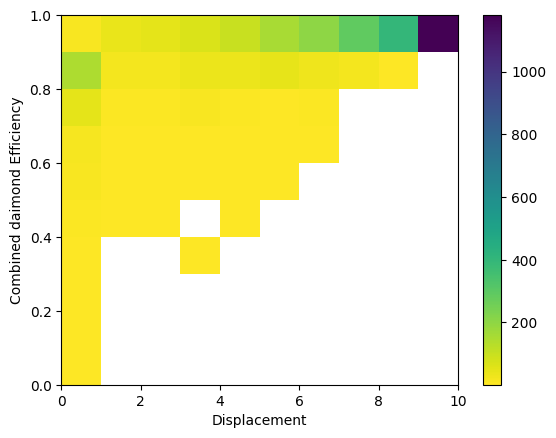

In [ ]:
plt.hist2d(data=hira, x='Preventive Condition/Procedure Score',y='IMM-2 Performance Rate',cmin=0.5,cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined daimond Efficiency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

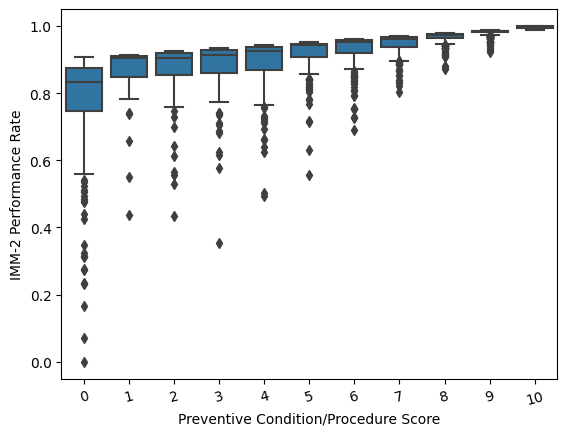

In [ ]:
base_color = sns.color_palette()[0]
sns.boxplot(data=hira, x='Preventive Condition/Procedure Score', y='IMM-2 Performance Rate',color=base_color)
plt.xticks(rotation=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

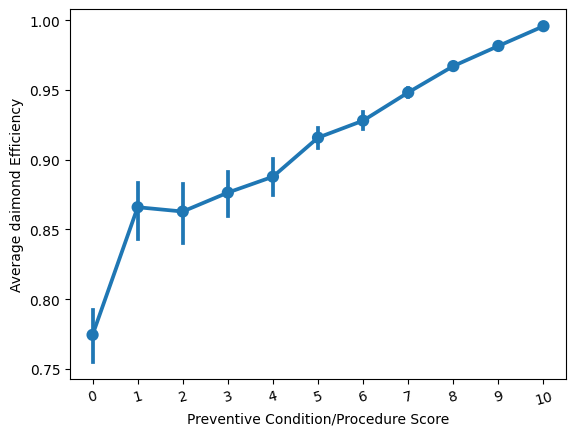

In [ ]:
sns.pointplot(data = hira, x = 'Preventive Condition/Procedure Score', y = 'IMM-2 Performance Rate')
plt.ylabel('Average daimond Efficiency')
plt.xticks(rotation=15)

In [ ]:


# Question 2: Influence of geographical and demographic factors
# Analyze and visualize geographical and demographic data

# Question 3: Machine learning model for prediction
# Prepare data for modeling
X = df[["Provider_Number", "ZIP_Code"]]  # Select relevant features
y = df["Preventive Condition/Procedure Score"]


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build a machine learning model (e.g., Linear Regression, Decision Tree, Random Forest)
# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()

# Train the model
# model.fit(X_train, y_train)

# Make predictions
# y_pred = model.predict(X_test)

# Evaluate the model (e.g., mean squared error, R-squared)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

# Step 4: Communicate your insights through visualizations and explanations

# Step 5: GitHub Repository and Blog Post
# Share your code and analysis in a GitHub repository
# Create a blog post summarizing your findings and insights for a non-technical audience

# Save your Jupyter Notebook or Python script with detailed comments and explanations





In [ ]:
import pandas as pd

# Replace 'your_file_path' with the actual file path to your CSV file
file_path = '/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data loading
print(df.head())

   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City State  ZIP_Code  County_Name  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland    CO     80538      LARIMER   
1     4295 HEMPSTEAD TURNPIKE        Bethpage    NY     11714       NASSAU   
2            7800 SHERIDAN ST  Pembroke Pines    FL     33024      BROWARD   
3           41 EAST POST R0AD    White Plains    NY     10601  WESTCHESTER   
4             565 ABBOTT ROAD         Buffalo    NY     14220         ERIE   

   IMM-2 Performance Rate IMM-2 Achievement Points IMM-2 Improvement Points  \
0                 0.91538              2 out of 10               7 out of 9   
1           

## Feature Engineering

Extract Features from Address

In [ ]:
import pandas as pd

# Replace 'your_file_path' with the actual file path to your CSV file
file_path = '/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Convert the 'ZIP_Code' column to a string data type
df['ZIP_Code'] = df['ZIP_Code'].astype(str)

# Extract the state abbreviation from the Address column
df['State_Abbreviation'] = df['Address'].str.split(', ').str[-1]

# Extract the street name from the Address column
df['Street_Name'] = df['Address'].str.split(', ').str[0]

# Extract the ZIP code prefix from the ZIP_Code column (assuming it's a full ZIP+4 code)
df['ZIP_Code_Prefix'] = df['ZIP_Code'].str.split('-').str[0]

# Display the first few rows of the DataFrame to verify the data loading and transformation
print(df.head())



   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City State ZIP_Code  County_Name  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland    CO    80538      LARIMER   
1     4295 HEMPSTEAD TURNPIKE        Bethpage    NY    11714       NASSAU   
2            7800 SHERIDAN ST  Pembroke Pines    FL    33024      BROWARD   
3           41 EAST POST R0AD    White Plains    NY    10601  WESTCHESTER   
4             565 ABBOTT ROAD         Buffalo    NY    14220         ERIE   

   IMM-2 Performance Rate IMM-2 Achievement Points IMM-2 Improvement Points  \
0                 0.91538              2 out of 10               7 out of 9   
1                 

Create a Composite Score

In [ ]:
df['IMM-2 Measure Score'] = pd.to_numeric(df['IMM-2 Measure Score'], errors='coerce')
df['Preventive Condition/Procedure Score'] = pd.to_numeric(df['Preventive Condition/Procedure Score'], errors='coerce')

# Create the 'Composite_Score' column by adding the two numeric columns
df['Composite_Score'] = df['IMM-2 Measure Score'] + df['Preventive Condition/Procedure Score']

# Display the first few rows of the DataFrame to verify the data loading and transformation
print(df.head())



   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City State ZIP_Code  County_Name  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland    CO    80538      LARIMER   
1     4295 HEMPSTEAD TURNPIKE        Bethpage    NY    11714       NASSAU   
2            7800 SHERIDAN ST  Pembroke Pines    FL    33024      BROWARD   
3           41 EAST POST R0AD    White Plains    NY    10601  WESTCHESTER   
4             565 ABBOTT ROAD         Buffalo    NY    14220         ERIE   

   IMM-2 Performance Rate IMM-2 Achievement Points IMM-2 Improvement Points  \
0                 0.91538              2 out of 10               7 out of 9   
1                 

Categorical Encoding (Label Encoding)

In [ ]:
# Label encoding for 'City' (assuming it has too many unique values for one-hot encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['City_Encoded'] = label_encoder.fit_transform(df['City'])

# Display the first few rows to verify the encoding
print(df.head())






   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City  ZIP_Code  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland     80538   
1     4295 HEMPSTEAD TURNPIKE        Bethpage     11714   
2            7800 SHERIDAN ST  Pembroke Pines     33024   
3           41 EAST POST R0AD    White Plains     10601   
4             565 ABBOTT ROAD         Buffalo     14220   

   IMM-2 Performance Rate IMM-2 Achievement Points IMM-2 Improvement Points  \
0                 0.91538              2 out of 10               7 out of 9   
1                 0.89249              0 out of 10               0 out of 9   
2                 1.00000             10 out of

Feature Interactions:

In [ ]:
df['Interaction_Score'] = df['IMM-2 Measure Score'] * df['Preventive Condition/Procedure Score']

# Display the first few rows to verify the new feature
print(df.head())



   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City  ZIP_Code  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland     80538   
1     4295 HEMPSTEAD TURNPIKE        Bethpage     11714   
2            7800 SHERIDAN ST  Pembroke Pines     33024   
3           41 EAST POST R0AD    White Plains     10601   
4             565 ABBOTT ROAD         Buffalo     14220   

   IMM-2 Performance Rate IMM-2 Achievement Points IMM-2 Improvement Points  \
0                 0.91538              2 out of 10               7 out of 9   
1                 0.89249              0 out of 10               0 out of 9   
2                 1.00000             10 out of

Feature Scaling (Standardization)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'IMM-2 Performance Rate' and 'IMM-2 Achievement Points' have non-numeric values
# Convert non-numeric values to NaN
df['IMM-2 Performance Rate'] = pd.to_numeric(df['IMM-2 Performance Rate'], errors='coerce')
df['IMM-2 Achievement Points'] = pd.to_numeric(df['IMM-2 Achievement Points'], errors='coerce')

# Fill NaN values with the mean (you can choose a different strategy if needed)
df['IMM-2 Performance Rate'].fillna(df['IMM-2 Performance Rate'].mean(), inplace=True)
df['IMM-2 Achievement Points'].fillna(df['IMM-2 Achievement Points'].mean(), inplace=True)

# Now you can apply StandardScaler
scaler = StandardScaler()
df[['IMM-2 Performance Rate', 'IMM-2 Achievement Points']] = scaler.fit_transform(df[['IMM-2 Performance Rate', 'IMM-2 Achievement Points']])

# Display the first few rows to verify the scaling
print(df.head())


   index  Provider_Number                  Hospital_Name  \
0      0            60119  MEDICAL CENTER OF THE ROCKIES   
1      1           330332             ST JOSEPH HOSPITAL   
2      2           100230     MEMORIAL HOSPITAL PEMBROKE   
3      3           330304   WHITE PLAINS HOSPITAL CENTER   
4      4           330279      MERCY HOSPITAL OF BUFFALO   

                      Address            City  ZIP_Code  \
0  2500 ROCKY MOUNTAIN AVENUE        Loveland     80538   
1     4295 HEMPSTEAD TURNPIKE        Bethpage     11714   
2            7800 SHERIDAN ST  Pembroke Pines     33024   
3           41 EAST POST R0AD    White Plains     10601   
4             565 ABBOTT ROAD         Buffalo     14220   

   IMM-2 Performance Rate  IMM-2 Achievement Points IMM-2 Improvement Points  \
0               -0.259677                       NaN               7 out of 9   
1               -0.520931                       NaN               0 out of 9   
2                0.706130                   

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## predictive model
1)linear regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset (replace 'your_file_path' with the actual file path)
file_path = '/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv'
df = pd.read_csv(file_path)

# Drop non-essential columns for modeling
df = df[['Preventive Condition/Procedure Score','ZIP_Code','Provider_Number']]

# Remove rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and the target variable (y)
y = df['Preventive Condition/Procedure Score']  # Target variable
X = df.drop(columns=['Preventive Condition/Procedure Score'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance (use mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 9.876822298270621


2) Decision Tree Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset (replace 'your_file_path' with the actual file path)
file_path = '/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv'
df = pd.read_csv(file_path)

# Drop non-essential columns for modeling
df = df[['Preventive Condition/Procedure Score','ZIP_Code','Provider_Number']]

# Remove rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and the target variable (y)
y = df['Preventive Condition/Procedure Score']  # Target variable
X = df.drop(columns=['Preventive Condition/Procedure Score'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree Regression Mean Squared Error:", mse)


Decision Tree Regression Mean Squared Error: 18.42079207920792


3) Random Forest Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset (replace 'your_file_path' with the actual file path)
file_path = '/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv'
df = pd.read_csv(file_path)

# Drop non-essential columns for modeling
df = df[['Preventive Condition/Procedure Score','ZIP_Code','Provider_Number']]

# Remove rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and the target variable (y)
y = df['Preventive Condition/Procedure Score']  # Target variable
X = df.drop(columns=['Preventive Condition/Procedure Score'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Random Forest Regression Mean Squared Error:", mse)


Random Forest Regression Mean Squared Error: 11.594064191419143


## Apply data visualization acccording to the predictive models

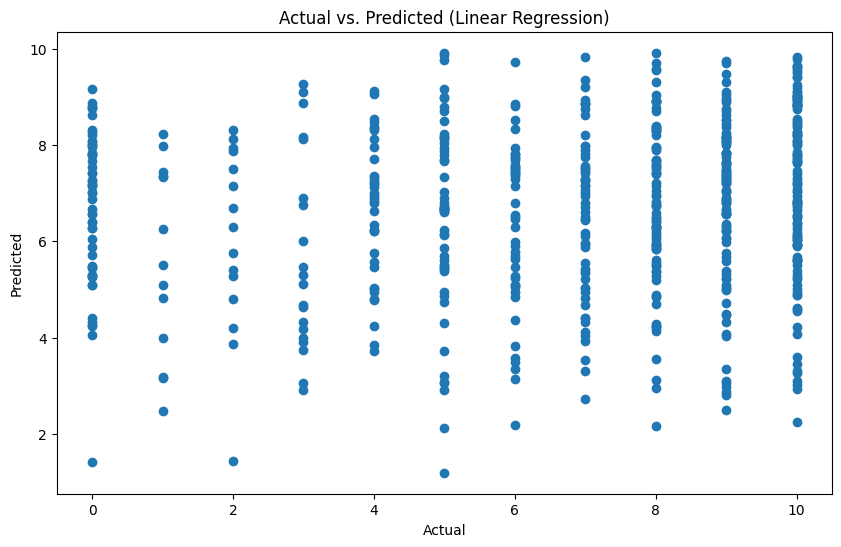

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted (Linear Regression)")
plt.show()

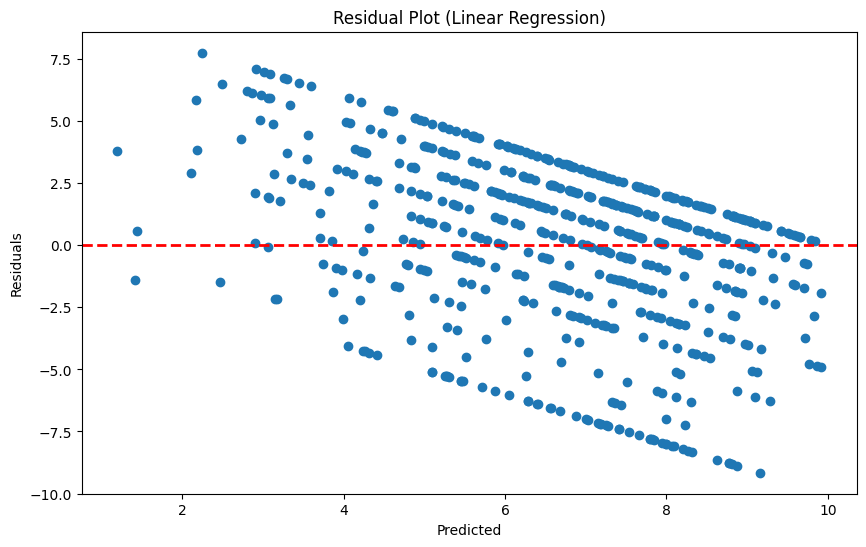

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.show()

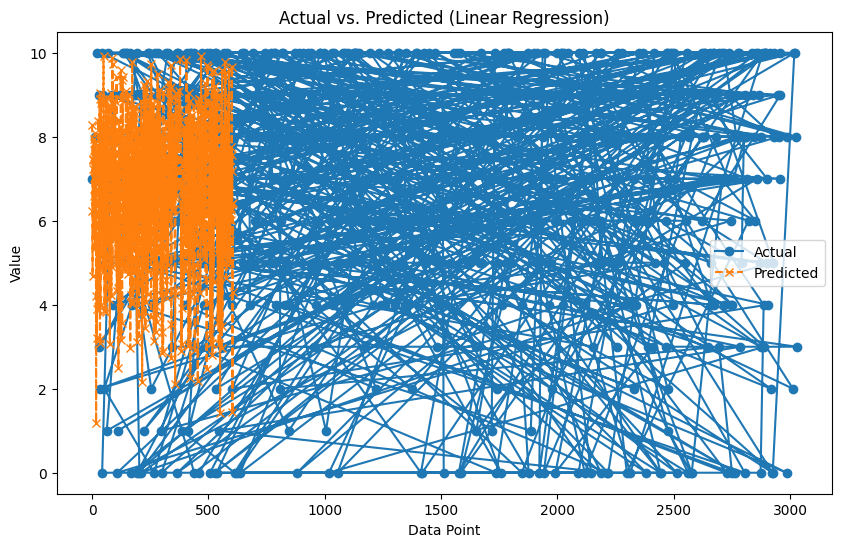

In [ ]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", linestyle="-", marker="o")
plt.plot(y_pred, label="Predicted", linestyle="--", marker="x")
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.title("Actual vs. Predicted (Linear Regression)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('/content/Hospital_Value-Based_Purchasing__HVBP____Preventive_Care_Scores (2).csv', usecols=[
    'index',
    'Provider_Number',
    'Hospital_Name',
    'Address',
    'City',
    'State',
    'ZIP_Code',
    'County_Name',
    'IMM-2 Performance Rate',
    'IMM-2 Achievement Points',
    'IMM-2 Improvement Points',
    'IMM-2 Measure Score',
    'Preventive Condition/Procedure Score'
])

# Function to extract numeric score from string
def extract_numeric_score(score_str):
    match = re.search(r'(\d+)', str(score_str))
    if match:
        return float(match.group(1))
    else:
        return np.nan

In [ ]:
# Extract numeric scores
data['Preventive_Score'] = data['Preventive Condition/Procedure Score'].apply(extract_numeric_score)

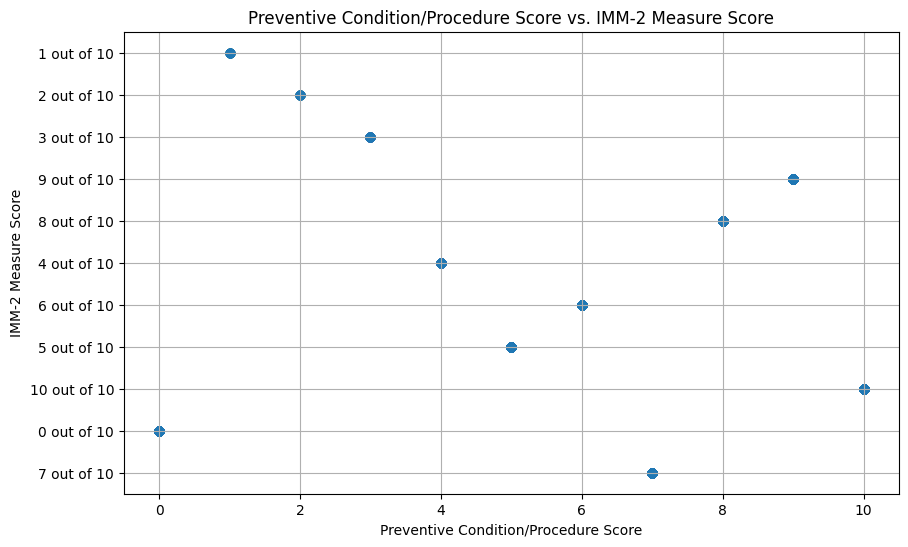

In [ ]:
# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Preventive_Score'], data['IMM-2 Measure Score'], alpha=0.5)
plt.xlabel('Preventive Condition/Procedure Score')
plt.ylabel('IMM-2 Measure Score')
plt.title('Preventive Condition/Procedure Score vs. IMM-2 Measure Score')
plt.grid(True)
plt.show()

In [ ]:
# Perform linear regression analysis with the extracted numeric scores
X = data[['Preventive Condition/Procedure Score']]
y = data['IMM-2 Performance Rate']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# Get the coefficients
coefficient = model.coef_[0]
intercept = model.intercept_

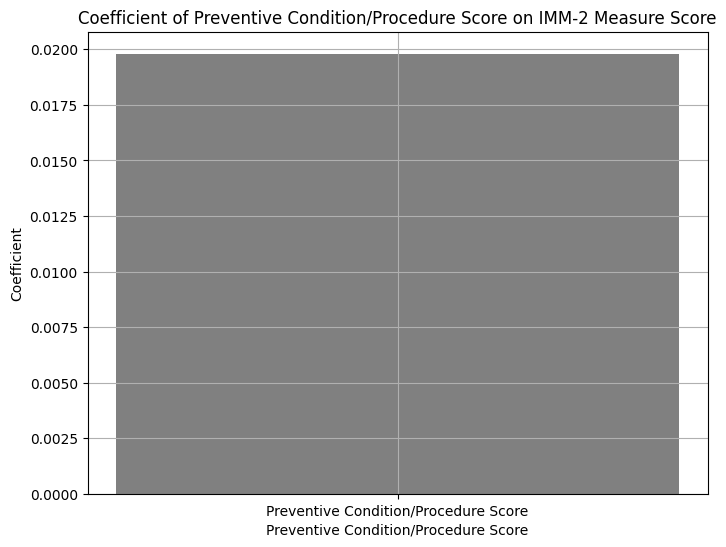

In [ ]:
# Bar chart to visualize coefficients
plt.figure(figsize=(8, 6))
plt.bar(['Preventive Condition/Procedure Score'], coefficient, color='grey')
plt.xlabel('Preventive Condition/Procedure Score')
plt.ylabel('Coefficient')
plt.title('Coefficient of Preventive Condition/Procedure Score on IMM-2 Measure Score')
plt.grid(True)
plt.show()